# Gradient Boosting at a Primitive Level

I will start off with a boring definition of what gradient boosting is which is along the lines of what Wikipedia states – gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of a group of 'weak' prediction models.

Lets start with the methodology, and then afterwards we shall implement this algorithm on an example.

Therefore, if we want to predict the vector $y$ given some matrix $\bf X$, we could start off by intiating an approximating of $y$
- Approximate it as 0, such that $\hat{y}$ = 0
- Approximate it is the mean of vector $y$, such that $\hat{y}$ = $\frac{1}{n}\left (\sum_{i=1}^n{y_i}\right ) $
- Or we could create a simple decision tree regressor/classifier using the columns in $\bf X$ as the set of independent variables

Once we have our initial prediction of $y$, given by $\hat{y}$, we can then calculate our first set of errors (otherwise known as residuals). This is simply a vector of the difference between our predicted values of $y$, against our actual values of $y$.

$$e_i = y - \hat{y}$$

Note: Instead of predicting the residuals, we can also predict the sign of the residuals.

For more information, I highly recommend this (free!) textbook, <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">The Elements of Statistical Learning</a>, by Trevor Hastie, Robert Tibshirani, Jerome H. Friedman.

I will now go through a simple example of using the Gradient Boosting Method from scratch.

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics

Firstly, we will create a set of data points that perfectly represent an upside down parabola, such that $y$ = $5 - x^{2}$, we will then randomize the y values slightly (which we will call y1) just so our set of data points contain some form of random error.

In [4]:
y= [5-i**2 for i in np.arange(-2, 2, 0.001)]

In [5]:
X = [i for i in np.arange(-2, 2, 0.001)]

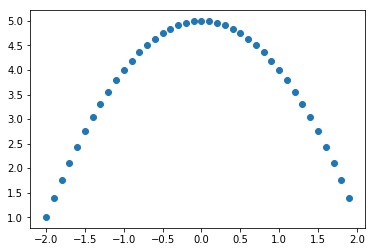

In [6]:
plt.scatter(X[0:-1:100], y[0:-1:100])

In [7]:
import random

In [8]:
y1 = [random.uniform(i-0.5, i+0.5) for i in y]

The graph below shows our set of data points. We will want to use a simple gradient boosting method to predict these $y$ values using the values of $x$

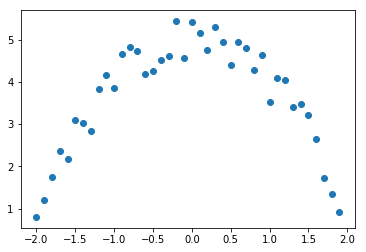

In [9]:
plt.scatter(X[0:-1:100], y1[0:-1:100])

In [11]:
from sklearn import tree

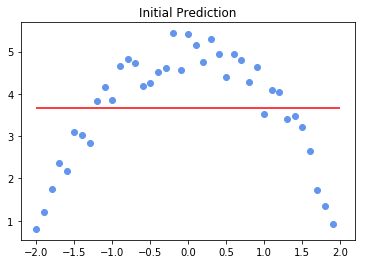

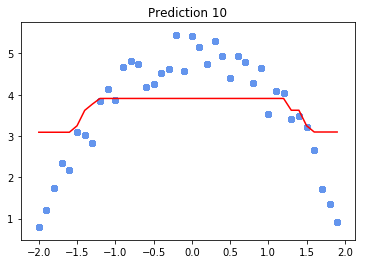

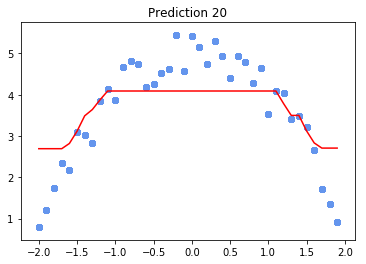

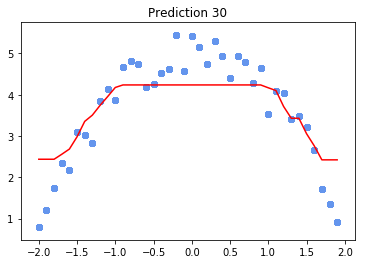

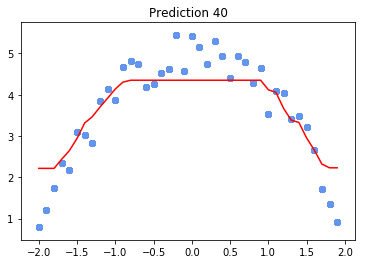

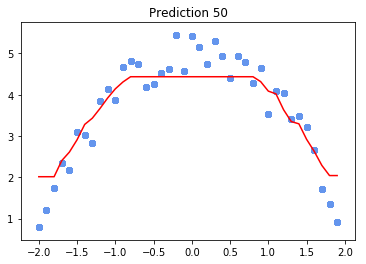

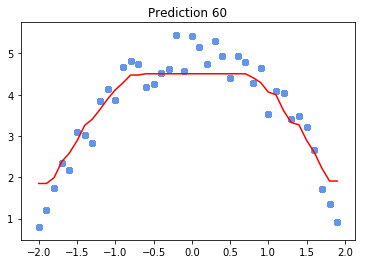

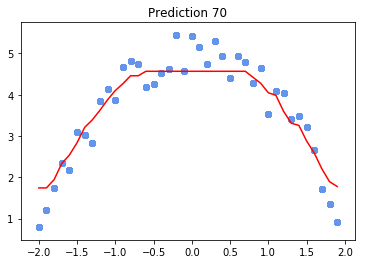

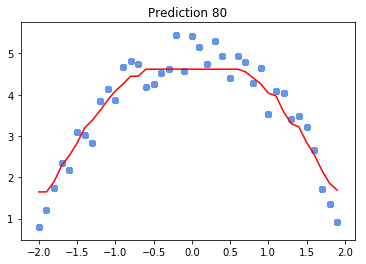

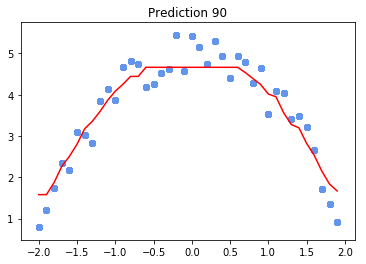

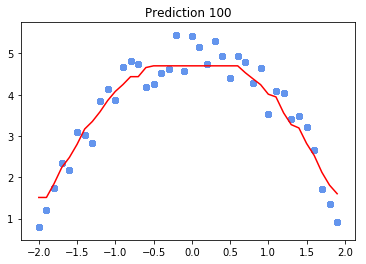

In [20]:
predf = np.mean(y1) # initial prediction, here we have just chosen to use the mean 
ei = y1 - predf # initialization of error
X1 = [[i] for i in X]
clf = tree.DecisionTreeRegressor(max_depth=1) # now we try to predict the errors using a decision tree
plt.title("Initial Prediction")
plt.scatter(X[0:-1:100], y1[0:-1:100], color = 'cornflowerblue')
plt.hlines(np.mean(y1), xmin = -2, xmax= 2, color = 'red')
plt.show()
for shrub in range(100):
    clf = clf.fit(X1, np.array(ei))
    pred_shrub = clf.predict(X1)
    predf += 0.1*pred_shrub #0.1 is the learning rate, and we add the prediction of the error to our original prediction
    ei = y1 - predf # now we recalculate our error and continue on with the loop
    plt.scatter(X[0:-1:100], y1[0:-1:100], color = 'cornflowerblue') #the code below just plots the results for every 10th iteration
    if (shrub+1)%10==0:
        plt.plot(X[0:-1:100], predf[0:-1:100], color='red')
        plt.title("Prediction {}".format(shrub+1))
        plt.show()